In [2]:
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [4]:
plt.rcParams['figure.figsize'] = 12, 6

In [5]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [17]:
subset = df.query("activity_id=='CMIP' & variable_id == 'lithk' & table_id == 'IfxGre' & experiment_id=='historical'")
subset_ncar = subset.query('institution_id == "NCAR"')
subset

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
55785,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
55904,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
56086,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
59898,CMIP,NCAR,CESM2,historical,r1i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
59996,CMIP,NCAR,CESM2,historical,r3i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
61453,CMIP,NCAR,CESM2,historical,r5i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62737,CMIP,NCAR,CESM2,historical,r2i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63320,CMIP,NCAR,CESM2,historical,r6i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
63791,CMIP,NCAR,CESM2,historical,r4i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
64563,CMIP,NCAR,CESM2,historical,r8i1p1f1,IfxGre,lithk,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [63]:
# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = subset_ncar.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset> Size: 1MB
Dimensions:  (ygre: 704, xgre: 416)
Coordinates:
  * ygre     (ygre) float32 3kB -3.396e+06 -3.392e+06 ... -5.88e+05 -5.84e+05
  * xgre     (xgre) float32 2kB -7.13e+05 -7.09e+05 ... 9.43e+05 9.47e+05
Data variables:
    lithk    (ygre, xgre) float32 1MB dask.array<chunksize=(704, 416), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1560
    ...                     ...
    sub_experiment_id:      none
    table_id:               IfxGre
    tracking_id:            hdl:21.14100/c042f109-2351-4d39-bf2c-6bdfa4d1da9a
    variable_id:            lithk
    variant_info:           CMIP6 CESM2-FV2 historical experiment (1850-2014)...
    variant_label:          r2i1p1f1

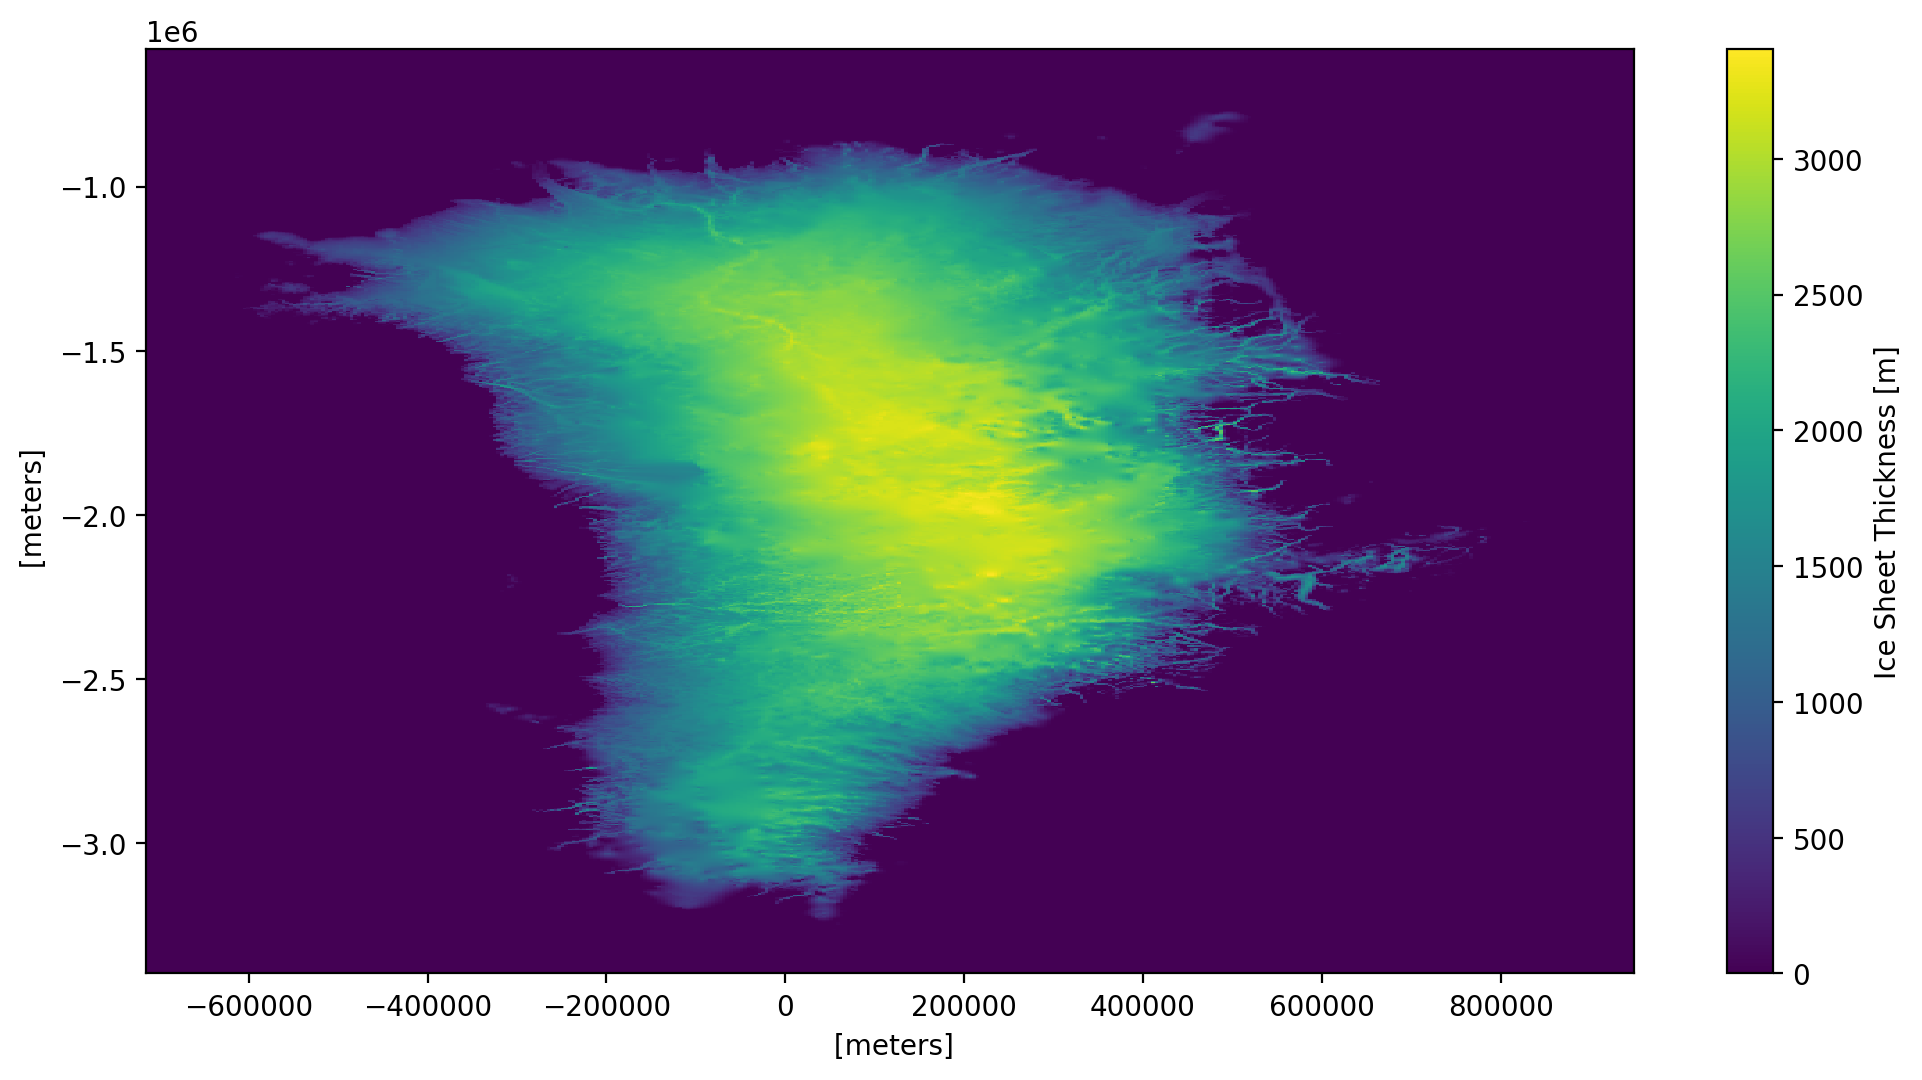

In [65]:
ds.lithk.plot()
plt.show()

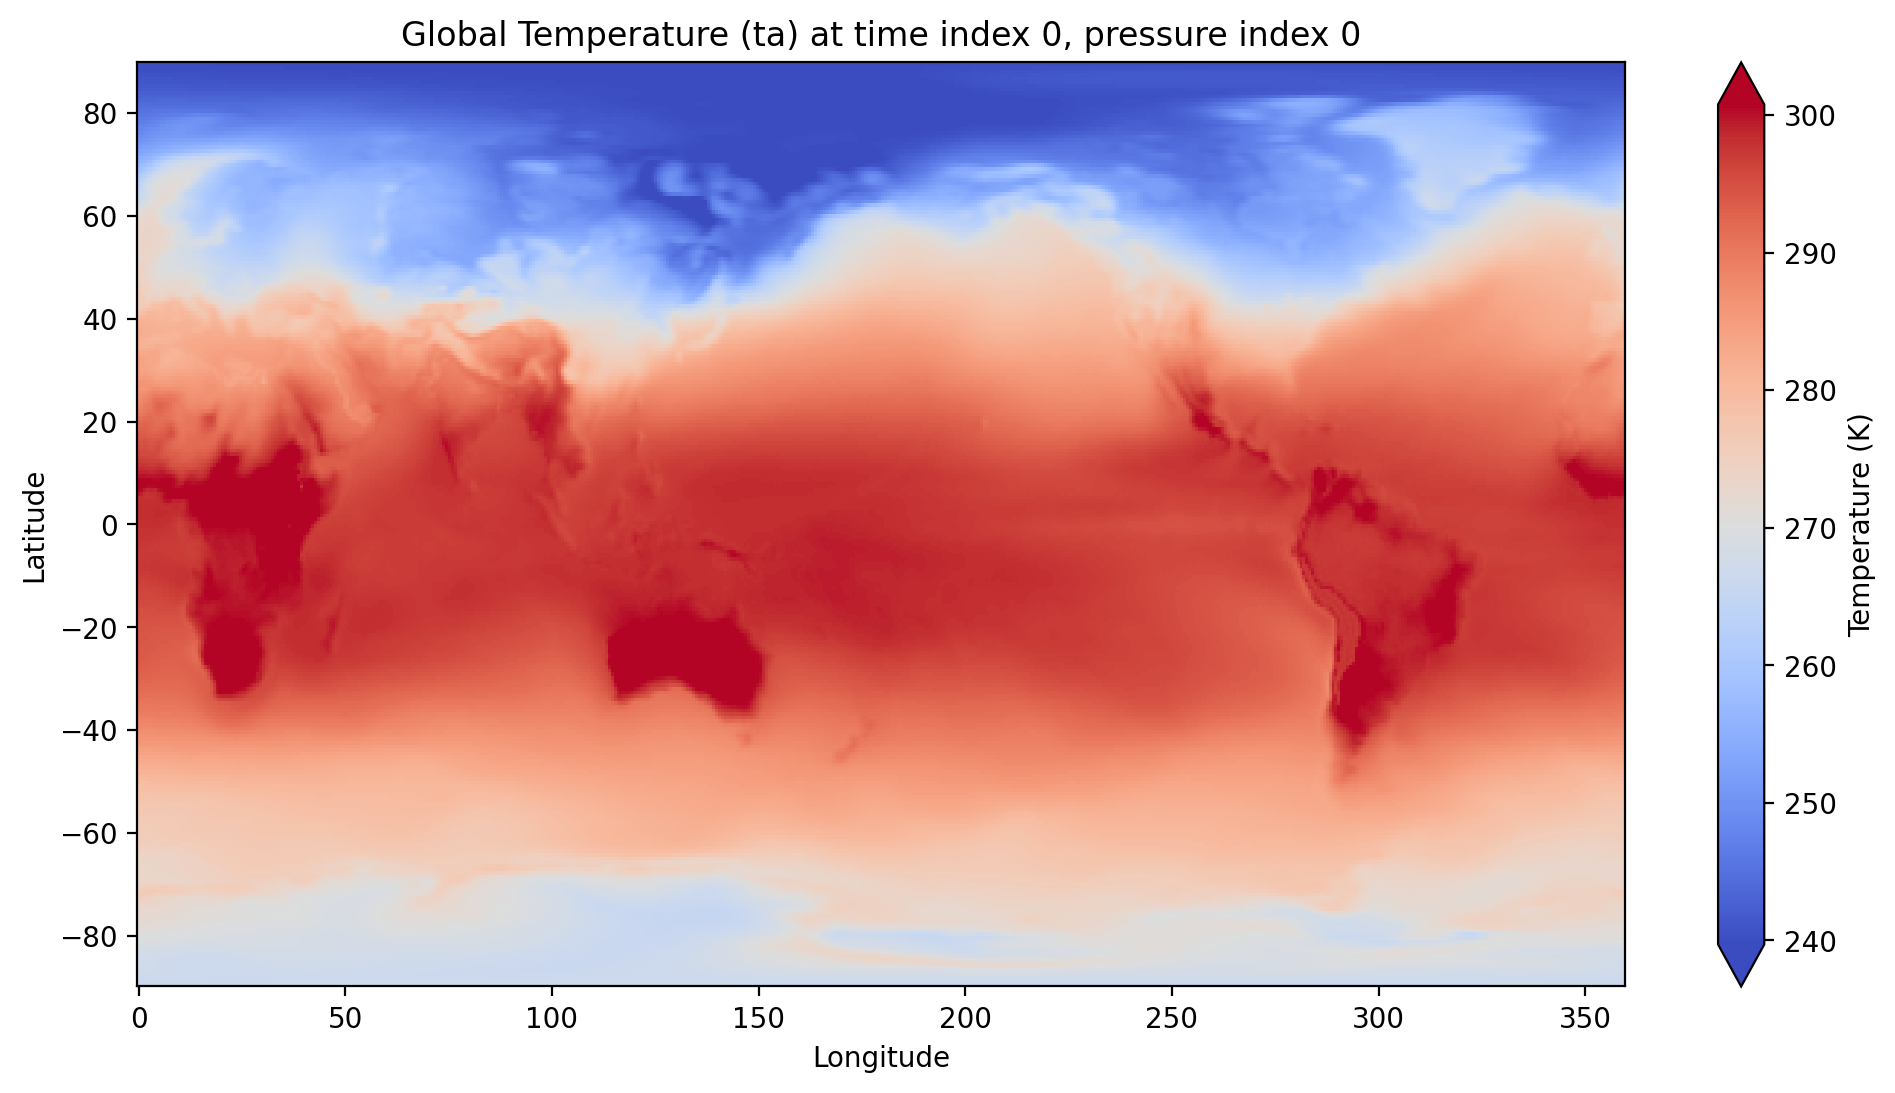

In [ ]:
subset_2 = df.query("activity_id=='CMIP' & variable_id == 'ta' & table_id == 'Amon' & experiment_id=='historical'")

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = subset_2.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
# ds.ta.sel().squeeze().plot()
# plt.show()  

var = 'ta'
time_index = 0
plev_index = 0  # choose a pressure level (e.g. 500 hPa if available)

# Select one time and one pressure level → makes it 2D
da2d = ds[var].isel(time=time_index, plev=plev_index)

im = da2d.plot(
    x="lon",
    y="lat",
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={"label": "Temperature (K)"}
)
plt.title(f"Global Temperature ({var}) at time index {time_index}, pressure index {plev_index}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

('time', 'lev', 'j', 'i')


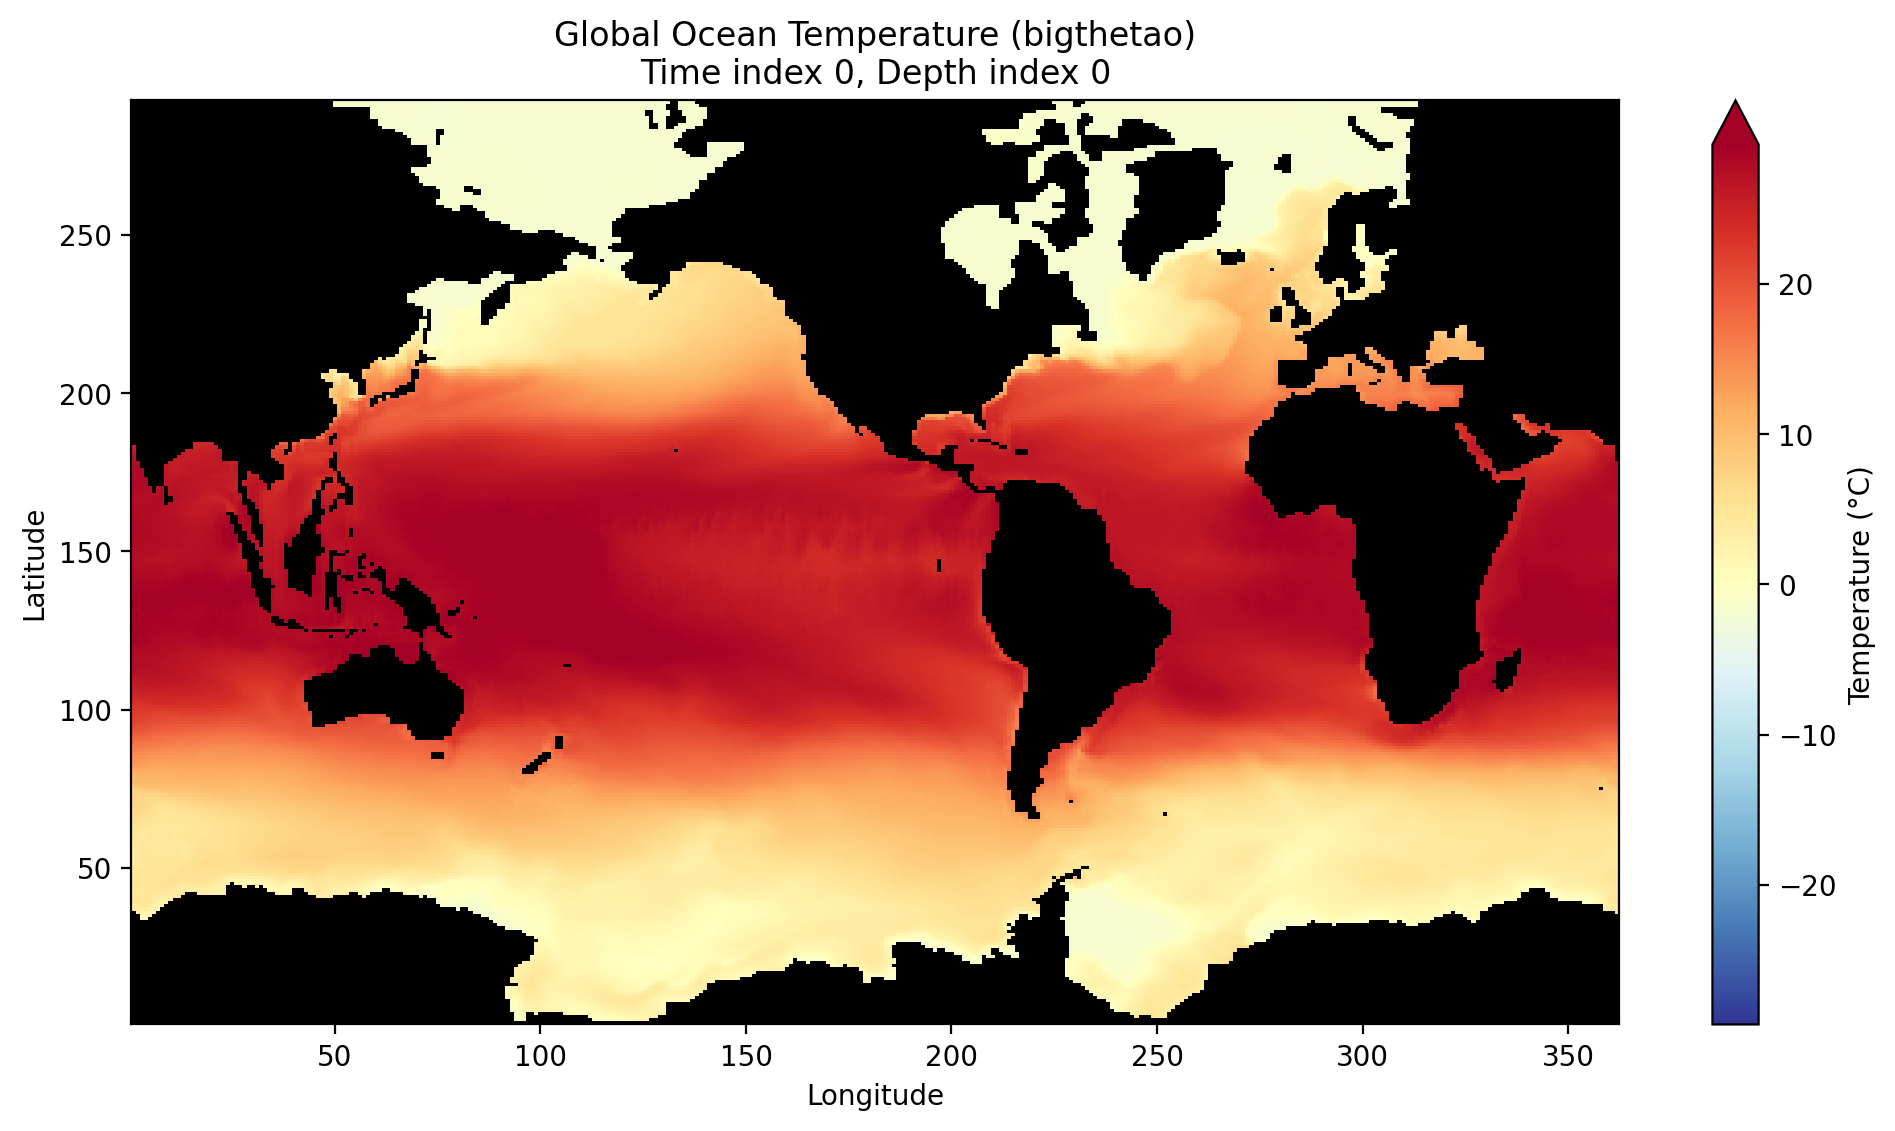

In [77]:
subset_2 = df.query("activity_id=='CMIP' & variable_id == 'bigthetao' & table_id == 'Omon' & experiment_id=='historical'")

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = subset_2.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

var = "bigthetao"
time_index = 0    # first time step
lev_index = 0     # surface (0 m depth)

# Check what dimensions exist
print(ds[var].dims)
# Should be ('time', 'lev', 'lat', 'lon')

# --- Select a 2D slice (time + depth) ---
da2d = ds[var].isel(time=time_index, lev=lev_index)

cmap = plt.cm.RdYlBu_r.copy() 
cmap.set_bad(color="black")

# --- Plot the heatmap ---
im = da2d.plot(
    x="i",
    y="j",
    cmap=cmap,
    robust=True,
    cbar_kwargs={"label": "Temperature (°C)"},
)
plt.title(f"Global Ocean Temperature ({var})\nTime index {time_index}, Depth index {lev_index}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

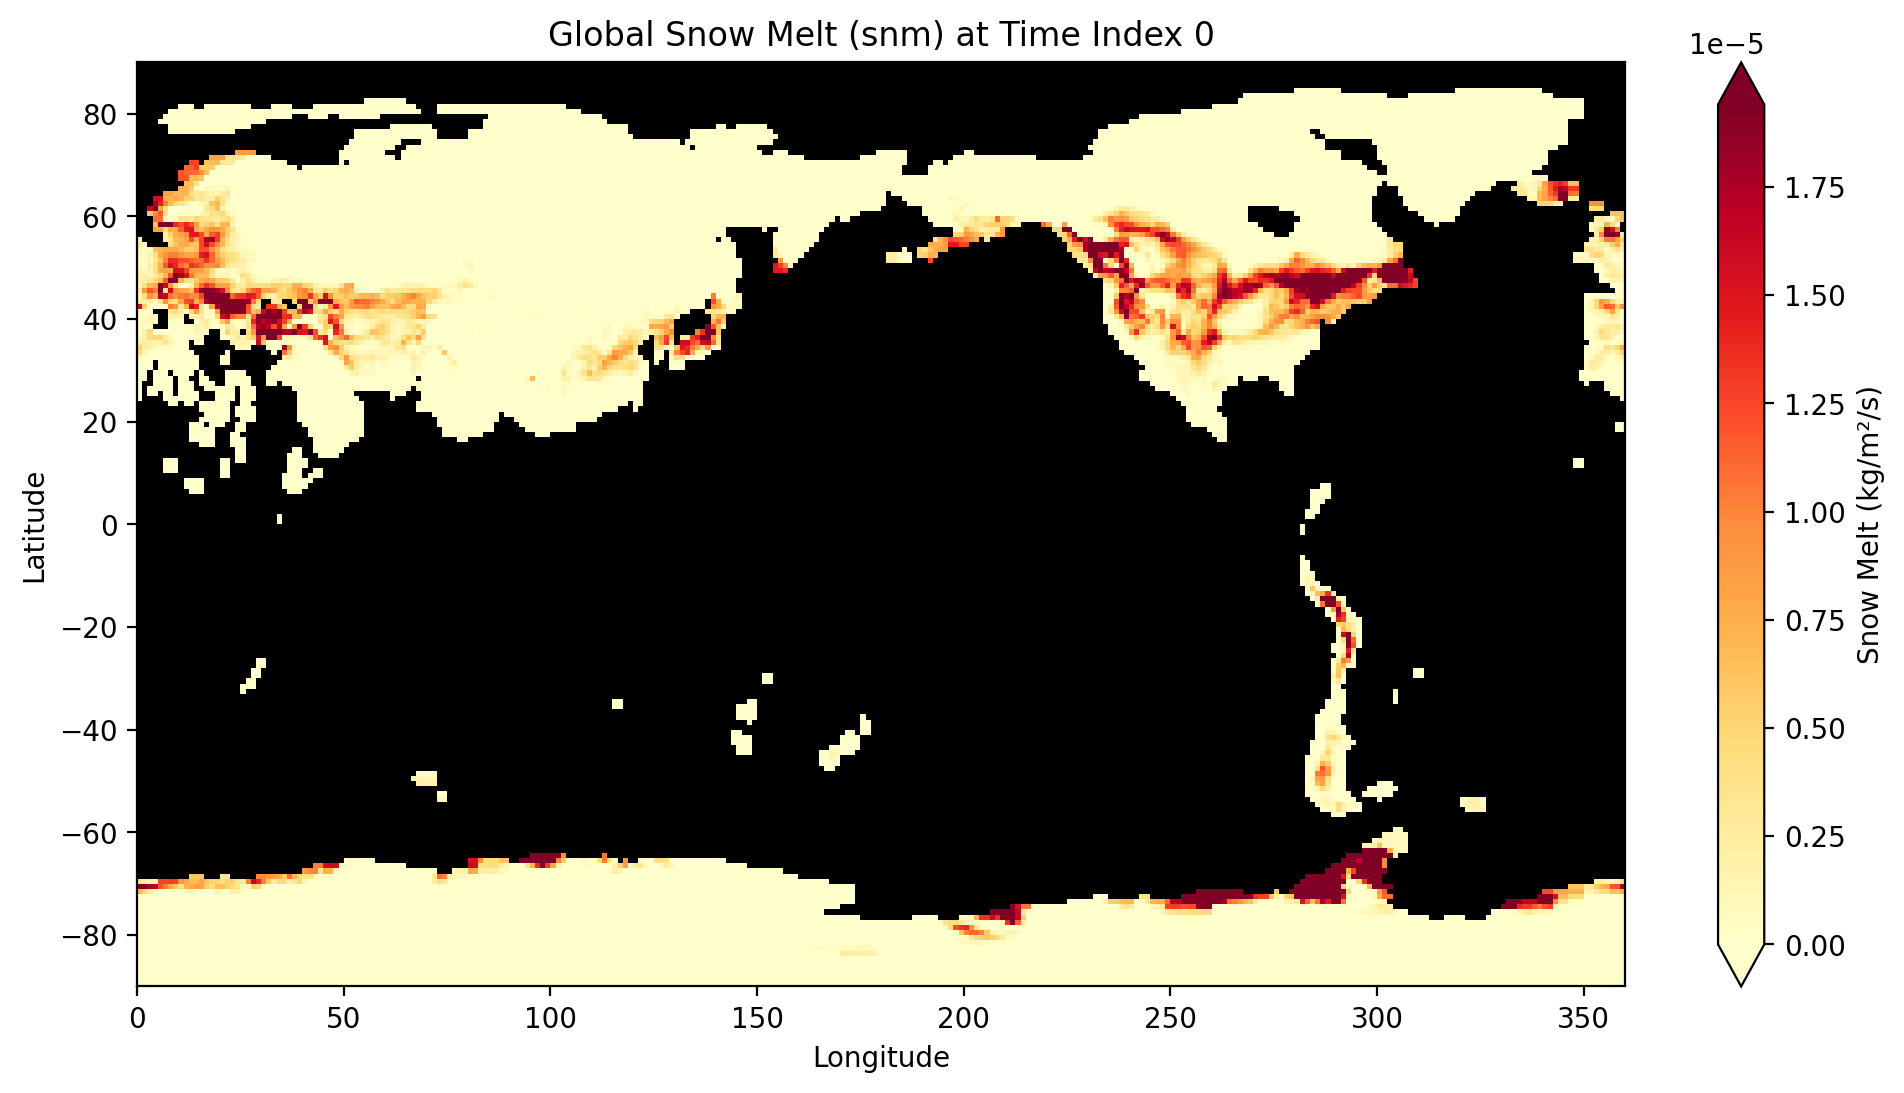

In [87]:
subset_2 = df.query("activity_id=='CMIP' & variable_id == 'snm' & table_id == 'LImon' & experiment_id=='historical'")

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = subset_2.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

var = 'snm'
time_index = 0  # choose first time slice

# Extract 2D data for that time
da = ds[var].isel(time=time_index)

# Mask out missing or zero values to make oceans black
masked = da.where(~np.isnan(da) & (da != 0))

# Plot
plt.figure(figsize=(12, 6))
im = masked.plot(
    x="lon",
    y="lat",
    cmap="YlOrRd",         # yellow-orange-red gradient
    robust=True,
    vmin=0,                # start color scale at 0
    cbar_kwargs={"label": "Snow Melt (kg/m²/s)"}
)

# Make ocean (masked) regions black
im.axes.set_facecolor("black")

plt.title(f"Global Snow Melt ({var}) at Time Index {time_index}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

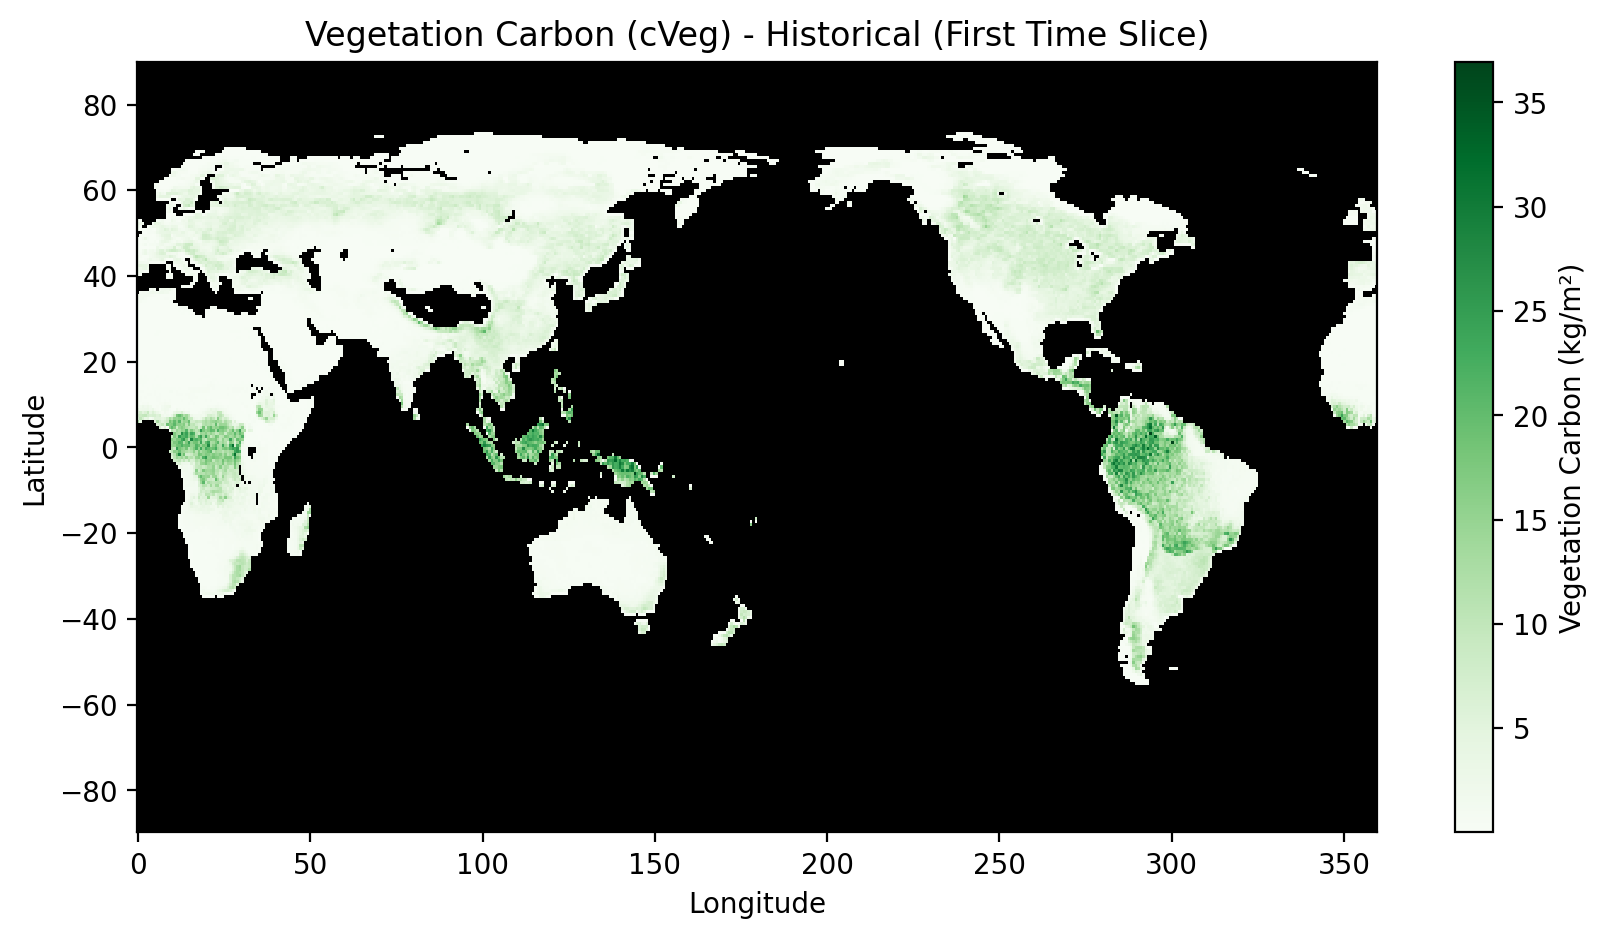

In [98]:
subset_2 = df.query("activity_id=='CMIP' & variable_id == 'cVeg' & table_id == 'Lmon' & experiment_id=='historical'")

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = subset_2.zstore.values[-1]

# create a mutable-mapping-style interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)

da = ds['cVeg'].isel(time=0) # mean_veg = ds['cVeg'].mean(dim='time') (time mean version)

# Mask ocean values (typically 0 or very small)
masked = da.where(da > 1e-6)  # mask values <= 0

# Create a colormap: vegetation = green, ocean = black
cmap = plt.cm.Greens.copy()
cmap.set_bad(color='black')

# Plot
plt.figure(figsize=(10, 5))
im = plt.pcolormesh(
    masked['lon'], masked['lat'], masked,
    cmap=cmap, shading='auto'
)
plt.colorbar(im, label='Vegetation Carbon (kg/m²)')
plt.title('Vegetation Carbon (cVeg) - Historical (First Time Slice)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()